In [ ]:
if(!require('ConvergenceConcepts')) {
  install.packages('ConvergenceConcepts')
  library('ConvergenceConcepts')
}

Aluno: Felipe Adrian Moreno Vera

### Problem

A large portion of the content of this course is concerned with computing high-dimensional integrals~via simulation.
Today you will be introduced to a simple-looking problem with a complicated closed-form solution and one we can approach using simulation.

Suppose you have a disc $C_R$ of radius $R$. 
Take $p = (p_x, p_y)$ and $ q = (q_x, q_y) \in C_R$ two points in the disk.  
Consider the Euclidean distance between $p$  and $q$, $||p-q|| = \sqrt{(p_x-q_x)^2 + (p_y-q_y)^2} = |p-q|$.

In [1]:
# Global Variables
R <- 10 # Radio
n <- 10000 # samples

### Problem A:

What is the _average_ distance between pairs of points in $C_R$ if they are picked uniformly at random?

### Part I: nuts and bolts

* To start building intuition, let's solve a related but much simpler problem.
 Consider an interval $[0, s]$, with $s>0$ and take $x_1,x_2 \in [0, s]$~_uniformly at random_.
 Show that the average distance between $x_1$ and $x_2$ is $s/3$.

__sol__:

Let X a random variable uniformly distributed over $[0,S]$, i.e., the probability density function of X is the following:

$
f_{X}(x) = 
     \begin{cases}
       \frac{1}{S} &\quad\text{if } x \in [0, S]\\
       0 &\quad\text{otherwise.} \\ 
     \end{cases}
$

Let us randomly pick two points in $[0,S]$ independently. Let us denote those by $X_1$ and $X_2$, which are random variables distributed according to $f_X$. 

The distance between the two points is a new random variable $Y = |X_1 - X_2|$.

Hence, we want to find the expected value $\mathbb{E}(Y) = \mathbb{E}(|X_1 - X_2|)$. we can define a function _g_ as follows:

$
g(x_1,x_2) = |x_1 - x_2| =
     \begin{cases}
      x_1 - x_2 &\quad\text{if } x_1 \geq x_2\\
       x_2 - x_1 &\quad\text{otherwise.} \\ 
     \end{cases}
$

Besides, since the two points are picked independently, the joint probability density function is the product of the pdf's of $X_1$ and $X_2$, i.e., $f_{X_1,X_2} = f_{X_1}(x_1) f_{X_2}(x_2) = \frac{1}{S^2}$.

Therefore, the expected value $\mathbb{E}(Y) = \mathbb{E}(g(X_1, X_2))$ is given by:

\begin{equation}
\mathbb{E}(Y) = \int_{0}^{S} \int_{0}^{S} g(x_1, x_2) f_{X_1, X_2} (x_1, x_2) \,d x_1\,d x_2 
\end{equation}

\begin{equation}
\mathbb{E}(Y) = \int_{0}^{S} \int_{0}^{S} |x_1 - x_2| \frac{1}{S^2} \,d x_1\,d x_2 
\end{equation}

\begin{equation}
\mathbb{E}(Y) = \frac{1}{S^2} \int_{0}^{S} \int_{0}^{x_1} (x_1 - x_2)  \,d x_2\,d x_1 + \frac{1}{S^2} \int_{0}^{S} \int_{x_1}^{S} (x_2 - x_1)  \,d x_2\,d x_1
\end{equation}

\begin{equation}
\mathbb{E}(Y) = \frac{1}{S^2} \frac{S^3}{6} + \frac{1}{S^2} \frac{S^3}{6} = \frac{S}{3}
\end{equation}

__Sol__: Numeric

In [2]:
n<-10000
s<-30 # DISTANCE
x<-runif(n, min=0, max=s)
y<-runif(n, min=0, max=s)
distance<-sum(abs(x-y))/n
distance

[1] 9.876804

* Show that Problem A is equivalent to computing
 \begin{equation*}
  I = \frac{1}{\pi^2 R^4}\int_{0}^{R}\int_{0}^{R}\int_{0}^{2\pi}\int_{0}^{2\pi}\sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos\phi(\theta_1, \theta_2)}r_1r_2\,d\theta_1\,d\theta_2\,dr_1\,dr_2,
 \end{equation*}
 where $\phi(\theta_1, \theta_2)$ is the central angle between $r_1$ and $r_2$.
 
 __Hint:__ Draw a picture.

__sol__:

From polar coordinates theory, in general any function f(x, y) with area A, we wan calculate the area as follows:

\begin{equation*}
  A = \iint\limits_\mathbb{R} f(x,y)\,dx\,dy
 \end{equation*}

So, we can be rewrite that using polar coordinates as $f(r, \theta)$ using x as p and y as q:

\begin{equation*}
  A = \int_0^{\theta} \int_0^{R} f(r,\theta)||\,r\,dr\,d\theta
 \end{equation*}

So, lets transform to polars:

Let $p = (r_1 \cos(\theta_1), r_1 \sin(\theta_1) )$ and $q = (r_2 \cos(\theta_2), r_2 \sin(\theta_2) )$ where:

$r_1 = \sqrt{p_x^2 + p_y^2}$ and $r_2 = \sqrt{q_x^2 + q_y^2}$

$||p-q|| = \sqrt{(r_1^2 \cos(\theta_1)^2 + r_2^2 \cos(\theta_2)^2 - 2 r_1 r_2 \cos(\theta_1) \cos(\theta_2) ) + (r_1^2 \sin(\theta_1)^2 + r_2^2 \sin(\theta_2)^2 - 2 r_1 r_2 \sin(\theta_1) \sin(\theta_2) )}$

$||p-q|| = \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 (\cos(\theta_1) \cos(\theta_2) + \sin(\theta_1) \sin(\theta_2) )}$

$||p-q|| = \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 \cos(\theta_1 - \theta_2) }$

So, remplacing results we have two points in $\mathbb{R}^2$ p and q using euclidean distance: 

\begin{equation}
\iint\limits_\mathbb{R} ||x-y|| \,dx\,dy = \iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 \cos(\theta_1 - \theta_2) } \,r_1\,r_2\,d\theta_1\,d\theta_2\,dr_1\,dr_2,
\end{equation}

Where the factor $r_1 r_2$ comes from the Jacobian.  
Besides, our sampling methods tell us how to calculate the _average_ or expectation as follows: 

\begin{equation}
E[||x-y||] = \frac{\iint\limits_\mathbb{R} ||x-y|| \,dx\,dy}{\text{Total Area}} = \frac{\iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 \cos(\theta_1 - \theta_2) } \,r_1\,r_2\,d\theta_1\,d\theta_2\,dr_1\,dr_2,}{\iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \,dr_1\,dr_2,\,d\theta_1\,d\theta_2}
\end{equation}

Where second term refers all possible points to take, so our final result is:

\begin{equation}
 I = E[||x-y||] = \frac{1}{\pi^2 R^4} \iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} \,r_1\,r_2\,d\theta_1\,d\theta_2 \,dr_1\,dr_2,
\end{equation}

* Compute $I$ in closed-form.  
__Hint:__ Look up _Crofton's mean value theorem_ or _Crofton's formula_. 

__sol__:

We define a function $f(R)$ as the _average distance_ in a disc with radius $R$. From this, we note that $f(R)$ is proportional to $R$ this means that if we __decrease__ the radius $R$, the _average distance_ $f(R)$ also __decrease__.

So, we can define $f(R)=kR$ and if $R=1$ we have $f(1) = k = f'(R)$. In order to find $k$ we need to calculate this term:

\begin{equation}
\lim_{\delta R \to 0} \frac{f(R) - f(R - \delta R)}{\delta R}
\end{equation}

Define as the new distance after apply $f()$ divided by the original distance $\delta R$: scaling factor.

__Note__: We select the expression $f(R) - f(R - \delta R)$ instead of $f(R + \delta R) - f(R)$ because we want to evaluate the internal region (see Fig.)

<img src="images/circle_radius_R.png" height=300 width=300></img>

From Figure, we got 3 different situations: two points inside $\delta R$ evaluated by $f()$, one point inside and one out evaluated by other function $g()$, and two out evaluated by other function $h()$. See Table to summary the idea:

<table>
    <tr>
        <td>
\begin{eqnarray}
            \\
2 in \\
1 in, 1 out\\
2 out
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
 \textit{Average distance} \\
f(R - \delta R) \\
g(R, R - \delta R) \\
h(R, R - \delta R) \\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
 \textit{Weight} \\
\alpha \\
\beta \\
\gamma \\
\end{eqnarray}
        </td>
    </tr>
</table>

Using the __Law of total Expectation__ our final is the weighted avergae of $f(R) = \alpha \times f(R - \delta R) + \beta \times g(R - \delta R)  + \gamma \times h(R, R - \delta R)$.

Let's define our probabilities such as: 

\begin{equation}
P(\mathbb{1}\text{ point inside}) = \frac{\text{Area Inner disc }R - \delta R }{\text{Area disc }R} = \frac{\pi  (R - \delta R)^2}{\pi R^2 } = \frac{(R - \delta R)^2}{R^2 } \\
P(\mathbb{1}\text{ point outside}) = 1-\frac{(R - \delta R)^2}{R^2 }
\end{equation}

Since we know that each point is an indenpent event, we evaluate for each case defined in Table we have:

__First case__: Two points inside:
\begin{equation}
P(\mathbb{2}\text{ points inside}) = P(\mathbb{1}\text{ point inside}) \times P(\mathbb{1}\text{ point inside}) \\
P(\mathbb{2}\text{ points inside}) = \frac{(R - \delta R)^2}{R^2 } \times \frac{(R - \delta R)^2}{R^2 } \\
P(\mathbb{2}\text{ points inside}) = \frac{R^4 - 4R^3(\delta R) + 6R^2 (\delta R)^2 - 4R(\delta R)^3 + (\delta R)^4}{R^4 } \\
P(\mathbb{2}\text{ points inside}) \approx 1 - \frac{4\delta R}{R} + o(\delta R)\\
\alpha = 1 - \frac{4\delta R}{R}
\end{equation}

__Second case__: One point inside and one outside:
\begin{equation}
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = P(\mathbb{1}\text{ point inside}) \times P(\mathbb{1}\text{ point outside})\\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = \frac{(R - \delta R)^2}{R^2 } \times (1-\frac{(R - \delta R)^2}{R^2 })\\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = (\frac{(R - \delta R)^2}{R^2 } - (\frac{(R - \delta R)^2}{R^2 })^2) \\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = 1 - 2 \frac{\delta R}{R} + \frac{(\delta R)^2}{R^2 } - (1 - \frac{4\delta R}{R} + o(\delta R)) \\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = 2 \frac{\delta R}{R} + \frac{(\delta R)^2}{R^2} + o(\delta R)) \\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) \approx \frac{2\delta R}{R} + o(\delta R)
\end{equation}

But this happen twice, so we have:

\begin{equation}
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) \approx \frac{4\delta R}{R} + o(\delta R)\\
\beta = \frac{4\delta R}{R}
\end{equation}

__Third case__: Two points outside
\begin{equation}
P(\mathbb{2}\text{ points outside}) = P(\mathbb{1}\text{ point outside}) \times P(\mathbb{1}\text{ point outside}) \\
P(\mathbb{2}\text{ points outside}) = (1-\frac{(R - \delta R)^2}{R^2 }) \times (1-\frac{(R - \delta R)^2}{R^2 })\\
P(\mathbb{2}\text{ points outside}) \approx 4\frac{(\delta R)^2}{R^2} + o(\delta R) \approx 0\\
\gamma = 0
\end{equation}

As you note, for powers of $\delta R$ we assume 0, because in our limit ${\delta R \to 0}$.

Finally, we calculate our $f(R)$ (eliminating all o(R)) as:

\begin{equation}
f(R) \approx (1 - \frac{4\delta R}{R}) \times f(R - \delta R) + \frac{4\delta R}{R} \times g(R, R - \delta R) \\
f(R) - f(R - \delta R) \approx -\frac{4\delta R}{R} \times f(R - \delta R) + \frac{4\delta R}{R} \times g(R, R - \delta R) \\
f(R) - f(R - \delta R) \approx \delta R \times \frac{4}{R} (g(R, R - \delta R) - f(R - \delta R) ) \\
\frac{f(R) - f(R - \delta R)}{\delta R} \approx \frac{4}{R} (g(R, R - \delta R) - f(R - \delta R) ) \\
\end{equation}

This expression is similar to our derivate, so doing $\lim_{\delta R \to 0}$ we have:

\begin{equation}
f'(R) = \frac{4}{R} (g(R, R) - f(R))\\
f'(R) = - \frac{4}{R} f(R) + \frac{4}{R} g(R, R)
\end{equation}

This is the _Crofton's differential equation formula_.

Finally, we need to calculate the value of the function $g(R,R)$. Since we define a $g()$ as the distance between one point inside and one outside, when $\delta R \to 0$ the second point $R-\delta R$ goes to the disc contour (edge). This means to calculate the average distance between a random point inside the disc and the edge. 

We can do this calculating the average distance $\rho$ using polar coordinates:

\begin{equation*}
  g(R, R) = \text{Distance of random point inner to the edge} \\
  g(R, R) = \frac{1}{\pi R^2} \int_{-\pi/2}^{\pi/2} \int_0^{2R\cos (\theta)} \rho\,\rho\,d\rho\,d\theta\\
  g(R, R) = \frac{32 R}{9\pi}
 \end{equation*}

Then, replacing in the _Crofton's differential equation formula_:

\begin{equation}
f'(R) = - \frac{4}{R} f(R) + \frac{4}{R} g(R, R) \\
k = - \frac{4}{R} kR + \frac{4}{R} \frac{32R}{9\pi} \\
k = \frac{128}{45\pi} \\
\end{equation}

Finally, we find that:

\begin{equation}
 I = \frac{1}{\pi^2 R^4} \iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} \,r_1\,r_2\,d\theta_1\,d\theta_2 \,dr_1\,dr_2,\\
 I = \frac{128R}{45\pi}
\end{equation}

In [3]:
# Let's define our R here
exact_value <- 128*R/(45*pi)
exact_value

[1] 9.054148

### Part II -- getting your hands dirty

Now we will move on to implementation.

__Problem B:__

Employ a simulation algorithm to approximate $\textit{I}$ . Provide point and interval estimates and give theoretical guarantees about them (consistency, coverage, etc).

* Represent $I$ as $\int_{\mathcal{X}} \phi(x)\pi(x)\,dx$ and justify your choice of $\phi$, $\pi$ and $\mathcal{X}$.
 Recall that these choices are arbitrary up to a point, but they might lead to wildly different empirical performances __and__ theoretical properties for estimators of $I$.
 
 __Justify__ your choices in light of the method you have been given to work with.
 Choose wisely and be rigorous in your justifications.
 
__sol__:

We start from $I = \int_{\mathcal{X}} f(x)\,dx = \int_{\mathcal{X}} \phi(x)\pi(x)\,dx$ where $\pi$ is the probability density function on $\mathcal{X}$ and:

\begin{equation}
\phi:\, x \to f(x)/\pi(x)
\end{equation}

We need to think about our data:

* We have two points p and q within a circle, e.g. let p = (x,y) with $x^2+y^2 \leq R^2$.
* We want to simulate the _average distance_ between them: $||p-q||$
* We want to construct a good estimator for this experiment.
* We want to use polar coordinates (R,$\theta$) to simulate them, where $R \geq \sqrt{x^2 + y^2}$ and $\theta=\arctan(x/y)$.

From this insights, we need to define the density function of R and $\theta$: 

\begin{equation}
f_{\Theta}(\theta) = \frac{1}{2\pi} \sim \mathcal{U}_{[0,2\pi]}\\
F_{\Theta}(\theta)=P_{\Theta}(\Theta < \theta) = \frac{\theta}{2\pi}\\
\end{equation}

For $\theta$ we can pick any value from $[0,\,2\pi]$ uniformly, in the case of the redius R, we kow that $0<R<\infty$ and they are __independent__.  

Since we know circumference of a disc ir $2\pi r$ and it grows linearly with $r$, let's say $f(r) = C r$ should be a probability density. Then, integrating $f(r)$ over the interval $[0,R]$ we have $F(r) = 1 = \frac{C}{2} R^2$. Just replacing and we get that $C = 2/R^2$. So: 

\begin{equation}
f_{R}(r) = 2\frac{r}{R^2}\\
F_R (r) = P_R(R < r) = \frac{r^2}{R^2}
\end{equation}

In order to simulate them, let's apply the inverse transformation for each, taking $u  \sim \mathcal{U}_{[0,1]}$:

\begin{equation}
F^{-1}_{\Theta}(u) = 2\pi u \sim \mathcal{U}_{[0,2\pi]}\\
F^{-1}_{R}(u) = R \sqrt{u}  \sim \mathcal{U}_{[0,R]}
\end{equation}

So, let's construct a joined pdf $\pi(r, \theta) = f_{R, \Theta} (r, \theta) = f_{R}(r) f_{\Theta}(\theta)$ we have:

\begin{equation}
\pi(r, \theta) = \frac{2r}{R^2} \frac{1}{2\pi} \\
\pi(r, \theta) = \frac{r}{\pi R^2}\\
\end{equation}

So, for the two points $p=(r_1 \cos(\theta_1), r_1\sin(\theta_1))$ and $q=(r_2 \cos(\theta_2), r_2\sin(\theta_2))$ we have

\begin{equation}
\pi(x_p, y_p) = \frac{1}{\pi R^2} r_1\\
\pi(x_q, y_q) = \frac{1}{\pi R^2} r_2
\end{equation}

So, the points $p$ and $q$ can be chosen independently each one, we have:

\begin{equation}
P(||p-q||) = \pi(x_p, y_p) \times \pi(x_q, y_q) \\
P(||p-q||) = \frac{1}{\pi R^2} r_1 \times \frac{1}{\pi R^2} r_2 \\
P(||p-q||) = \frac{1}{\pi^2 R^4} r_1 r_2 \\
\end{equation}

In summary, we have our $f$, $\phi$, and $\pi$ evaluated in our points $p$ and $q$ in polar coordinates:

\begin{equation}
f(p, q) = \frac{1}{\pi^2 R^4} \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} r_1 r_2 \\
\pi(p, q) =  \frac{1}{\pi^2 R^4} r_1 r_2\\
\phi(p, q) = \frac{f(p,q)}{\pi(p,q)}\\
\phi(p, q) = \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} 
\end{equation}

Finally, in order to simulate each point $\mathcal{X}_1, \mathcal{X}_2, \dots, \mathcal{X_n}$, each $\mathcal{X}_i = (r_i\cos(\theta_i), r_i\sin(\theta_i)))$ where $r_i\in [0, R]$ and $\theta_i \in [0, 2\pi]$.

We will use the _uniform distribution_ as follows:

* For each sample $\mathcal{X}_i$ we define two numbers $u_1, u_2 \sim \mathcal{U}_{[0,1]}$
* Assign values to $r_i=R\sqrt{u_1}$ and $\theta_i=2\pi u_2$
* Tendo $r \sim \mathcal{U}_{[0,R]}$ and $\theta \sim \mathcal{U}_{[0,2\pi]}$

__MonteCarlo__ exmaple:

In [4]:
polar_distance <- function(r_1, theta_1, r_2, theta_2) {
    return ( sqrt( r_1^2 + r_2^2 - 2*r_1*r_2*cos(theta_1 - theta_2) ) );
}

In [ ]:
simulate <- function(n, R){
    theta_1 <- 2*pi* runif(n, min = 0, max = 1.0)
    r_1 <- R*sqrt( runif(n, min = 0, max = 1.0) )

    theta_2 <- 2*pi* runif(n, min = 0, max = 1.0)
    r_2 <- R*sqrt( runif(n, min = 0, max = 1.0) )
    
    distances <- polar_distance(r_1, theta_1, r_2, theta_2)
    
    return (distances)
}

In [5]:
distances <- simulate(n, R)

approximation <- mean(distances)
approximation

[1] 9.07384

In [6]:
error <- exact_value - approximation
error

[1] -0.01969206

* Again, starting from the eventual samples you will obtain with your method, construct a non-empty family of estimators of $I$ and discuss whether it is (strongly) consistent and whether a central limit theorem can be established.

__sol__:

We want to estimate $\phi$ by __Gibbs Sampling__. So, in order to sample using Gibbs, we need to sample from a conditional distribution than to marginalize by integrating over a joint distribution.

Suppose we want to obtain $k$ samples of $\mathbf {X} =(x_{1},\dots ,x_{n})$ from a joint distribution $p(x_{1},\dots ,x_{n})$. 

Denote the i-th sample by $\mathbf {X} ^{(i)}=\left(x_{1}^{(i)},\dots ,x_{n}^{(i)}\right)$. We proceed as follows:

* We begin with some initial value $\mathbf {X} ^{(0)}$.
* 
* Repeat the above step $k$ times.



and $\mathcal{X}$ is:

* Detail a suite of diagnostics that might be employed in your application to detect convergence or performance problems.
 Extra points for those who design algorithms that exploit the structure of this particular integration problem. 

__sol__:

Confidence Interval 95\%:

In [12]:
margin <- qt(0.95, df=n-1)*sd(distances)/sqrt(n)

In [13]:
lowerinterval <- approximation - margin
lowerinterval 

[1] 9.004013

In [14]:
upperinterval <- approximation + margin
upperinterval 

[1] 9.143666

Convergence:

In [ ]:
# Let X1, X2, ..., Xn be independent random variables such that #
# P[Xn=sqrt(n)]=1/n and P[Xn=0]=1-1/n                           #
# Does Xn converges to 0 in 2-th mean? in probability?          #

Loading required package: ConvergenceConcepts
Loading required package: tcltk
Loading required package: tkrplot
Warning message:
"package 'tkrplot' was built under R version 3.6.3"Loading required package: lattice


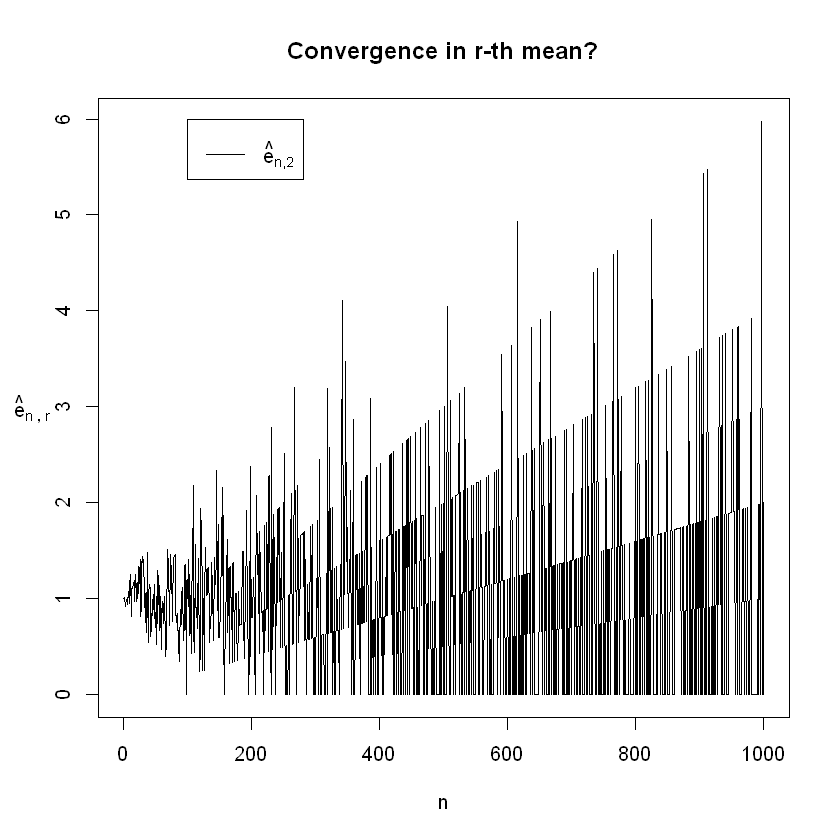

In [10]:
options(example.ask=FALSE)

pnotrgen<-function(n){rbinom(n,1,1/(1:n))*sqrt(1:n)}

check.convergence(nmax=1000, M=500, genXn=pnotrgen, mode="r", r=2)

legend(100, 6, legend=expression(hat(e)["n,2"]), lty=1)

tt3.1 <<- check.convergence(nmax=1000,M=500,genXn=pnotrgen,mode="p")

* For each $R \in \{0.01, 0.1, 1, 10, 100, 1000, 10000\}$, perform $M=500$ runs from your simulation method and compute: (i) variance (ii) bias (iii) standard deviation of the mean (MCSE).

__sol__:

* Can you identify one key quantity missing from the previous item?  
 _Hint:_ it bears relevance to the real world application of any computational method.
estimator.

__Final Notes__: In order to change the variables from polar to cartesian coordinates, we just need to apply the jacobian rule: $\hat{\pi}(x, y) = \pi(r, \theta) |det \frac{\partial (r, \theta)}{\partial (x, y)}|$

Using the one point, we have: $p=(x,y) = ( r\cos(\theta), r\sin(\theta) )$ and $(r,\theta) = ( \sqrt{x^2 + y^2}, \arctan(x/y) )$. Where:

\begin{equation}
|det \frac{\partial (r, \theta)}{\partial (x, y)}| = \begin{vmatrix}
    \cos(\theta) & -r\sin(\theta) \\
    \sin(\theta)    & r\cos(\theta)
\end{vmatrix} \\
|det \frac{\partial (r, \theta)}{\partial (x, y)}| = r
\end{equation}

Finally, for the point $p=(x, y)$ we obtain $\pi(x, y)$:

\begin{equation}
\hat{\pi}(x, y) =  |det \frac{\partial (r, \theta)}{\partial (x, y)}| \pi(r, \theta) \\
\hat{\pi}(x, y) = r \pi(r, \theta) = \frac{1}{\pi R^2} r^2\\
\hat{\pi}(x, y) = \frac{x^2 + y^2}{\pi R^2}
\end{equation}